# Heart Disease Cleveland UCI
<p> Binary Classification heart disease </p>

In [50]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# CONSTS
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

DATA_PATH = '../data/raw/'

import warnings
warnings.filterwarnings('ignore')

## Some review on data - 13 attrs
<ul>
    <li> age: age in years </li>
    <li> sex: sex (1 = male; 0 = female) </li>
    <li> cp: chest pain type
        <ul>
            <li> -- Value 0: typical angina </li>
            <li> -- Value 1: atypical angina </li>
            <li> -- Value 2: non-anginal pain </li>
            <li> -- Value 3: asymptomatic </li>
        </ul>
    </li>
    <li> trestbps: resting blood pressure (in mm Hg on admission to the hospital) </li>
    <li> chol: serum cholestoral in mg/dl </li>
    <li> fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) </li>
    <li> restecg: resting electrocardiographic results 
        <ul>
            <li> -- Value 0: normal </li>
            <li> -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) </li>
            <li> -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria </li>
        </ul>
    </li>
    <li> thalach: maximum heart rate achieved </li>
    <li> exang: exercise induced angina (1 = yes; 0 = no) </li>
    <li> oldpeak = ST depression induced by exercise relative to rest </li>
    <li> slope: the slope of the peak exercise ST segment
        <ul>
            <li> -- Value 0: upsloping </li>
            <li> -- Value 1: flat </li>
            <li> -- Value 2: downsloping </li>
        </ul>
    </li>
    <li> ca: number of major vessels (0-3) colored by flourosopy </li>
    <li> thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label </li>
    <li> condition: 0 = no disease, 1 = disease </li}>
</ul>

In [51]:
df = pd.read_csv(DATA_PATH + 'heart_cleveland_upload.csv')
print(df.shape)
df.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [52]:
df.describe() # No Nans in Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<AxesSubplot:>

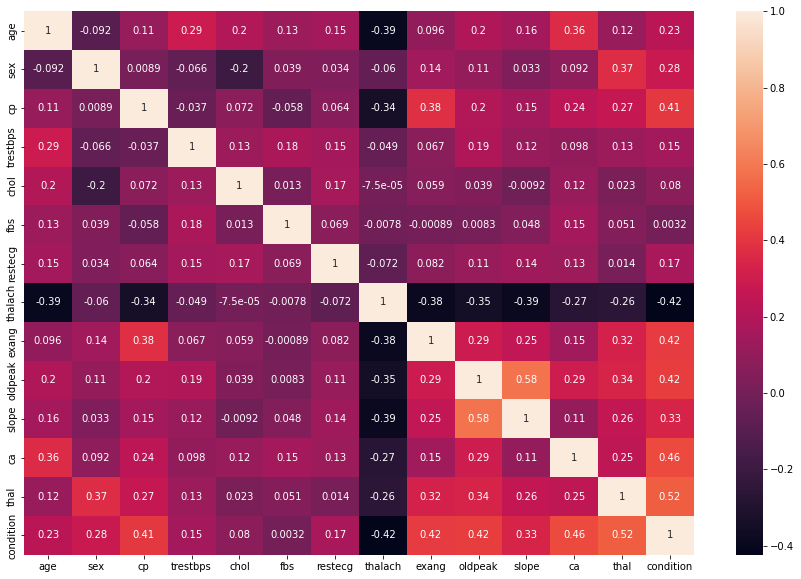

In [53]:
# Let's look at correlations
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

# Here we can see that Traget variable (condition) has some correlations with thal, ca and oldpeek
# They could be important features

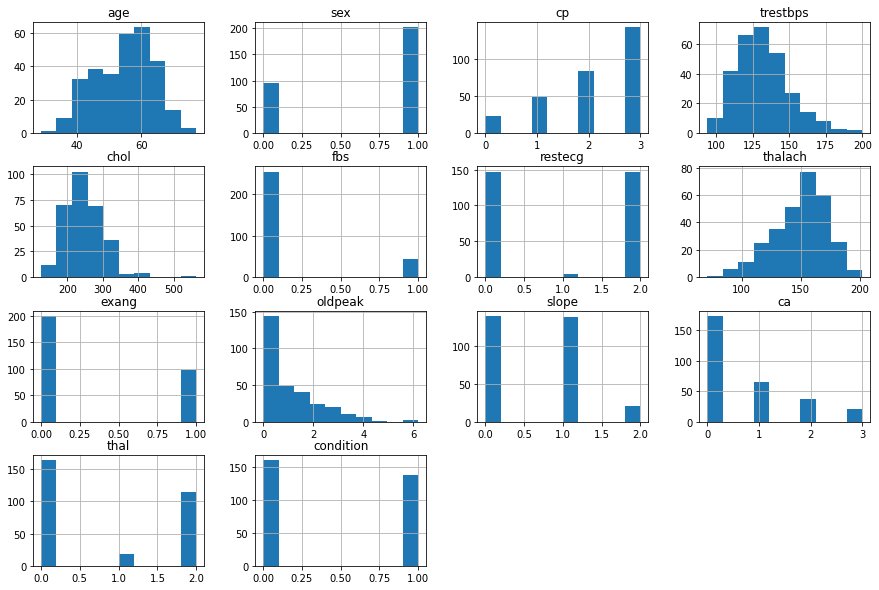

In [54]:
# Let's look at features distribution
_ = df.hist(figsize=(15, 10))

In [55]:
# Find out type of features - categorial or numeric for Poirplot
categorial = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']
numeric = [column for column in df.columns if column not in categorial] + ['condition']

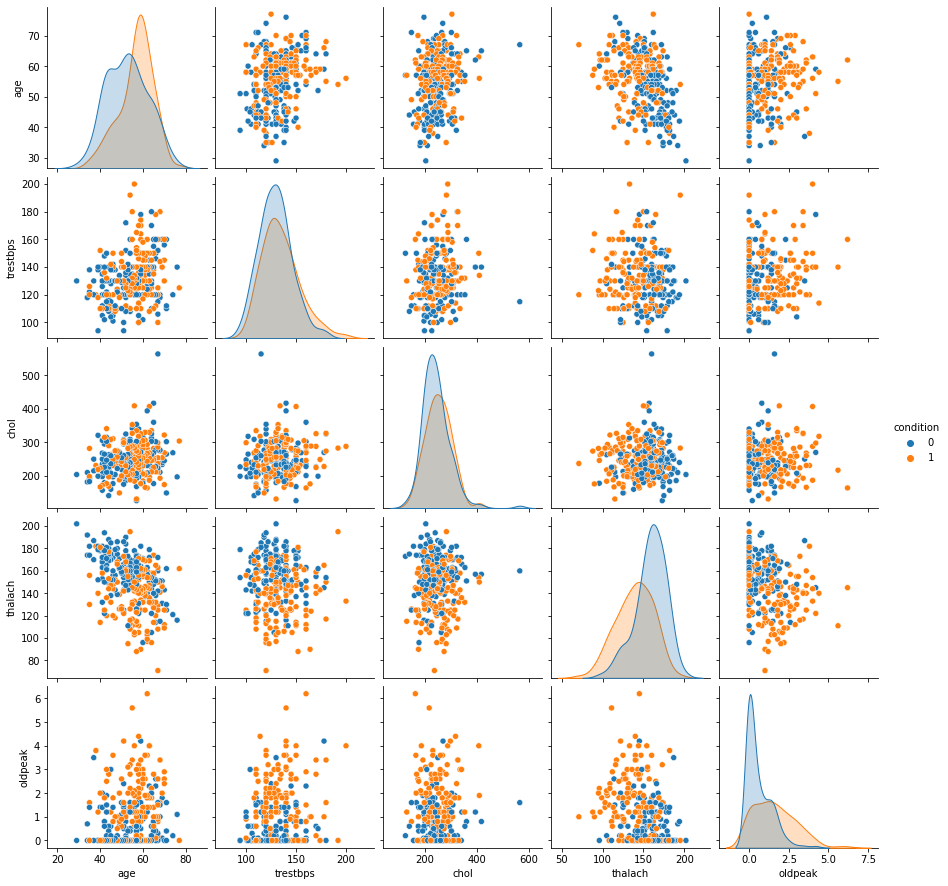

In [56]:
# We can see that somewhere dots are easily devideble
sns.pairplot(df[numeric], hue='condition')